In [4]:
import requests
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import pmdarima as pm

In [5]:
data = pd.read_csv('GOOG.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2015,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
1,1/5/2015,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2,1/6/2015,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
3,1/7/2015,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
4,1/8/2015,24.831326,25.105074,24.482782,25.065184,25.065184,67071641


In [6]:
Date1 = data['Date']
Price = data['Open']
new_data = []
new_data.append(pd.DataFrame({'Date':Date1,
                              'Price': Price
                              }))
new_data_df = pd.concat(new_data)
new_data_df.head()

,Date,Price
0,1/2/2015,26.378078
1,1/5/2015,26.091366
2,1/6/2015,25.679497
3,1/7/2015,25.280592
4,1/8/2015,24.831326


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2108 non-null   object 
 1   Price   2108 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.1+ KB


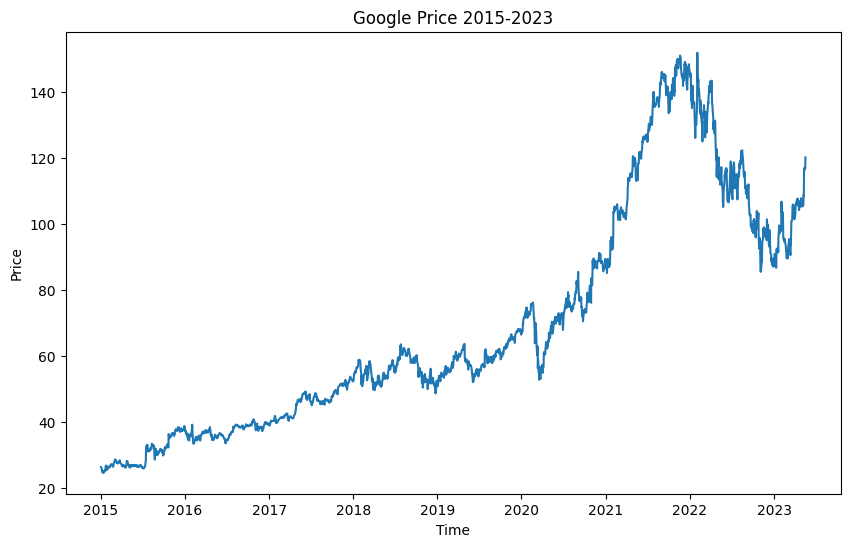

In [7]:
new_data_df.dropna(inplace=True)
new_data_df.info()
new_data_df['Date'] = pd.to_datetime(new_data_df['Date'])  # Ensure the date column is in datetime format
df = new_data_df.set_index('Date')  # Set the date column as the index of the DataFrame

plt.figure(figsize=(10, 6))
plt.plot(df['Price'])
plt.title('Google Price 2015-2023')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

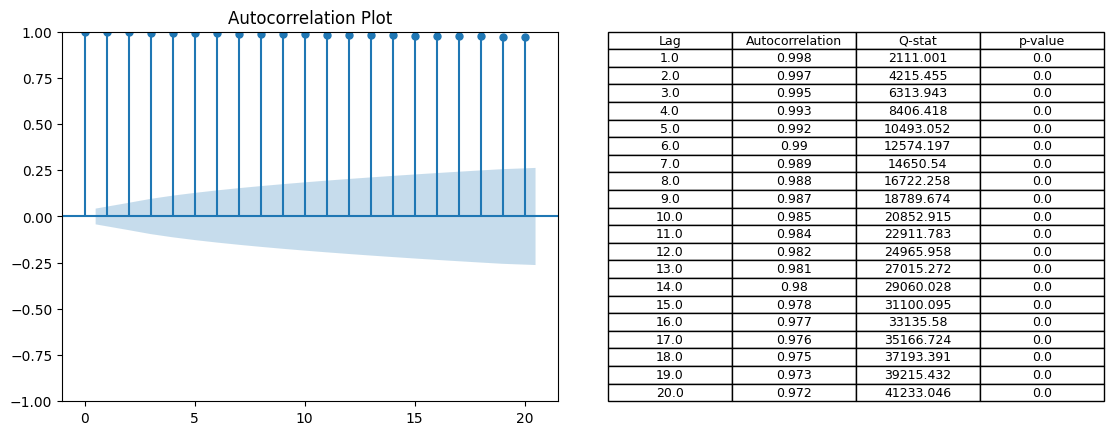

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf, q_stat
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Compute Autocorrelation
n_lags = 20
autocorr = acf(df['Price'], nlags=n_lags)

# Compute Ljung-Box Q-Stat
qstats, pvalues = q_stat(autocorr, len(df['Price']))

# Plot Autocorrelation
fig, ax = plt.subplots()
plot_acf(df['Price'], lags=n_lags, ax=ax)
plt.title('Autocorrelation Plot')

# Create table data
table_data = {
    'Lag': range(1, n_lags+1),
    'Autocorrelation': np.round(autocorr[1:n_lags+1], 3),
    'Q-stat': np.round(qstats[:n_lags], 3),
    'p-value': pvalues[:n_lags]
}

# Create DataFrame
df_table = pd.DataFrame(table_data)

# Print DataFrame on right side of plot
ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc = 'center', loc='right', bbox=[1.1, 0, 1, 1])

plt.show()

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


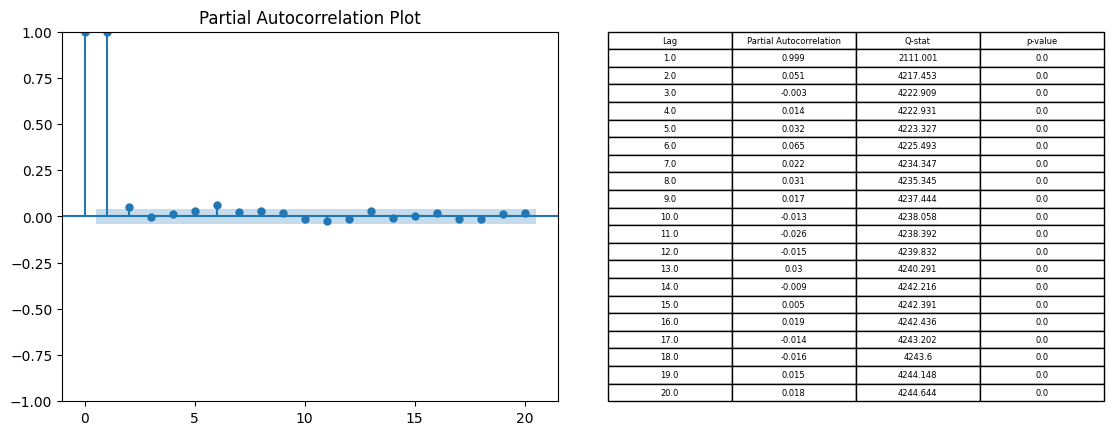

In [9]:
# Compute Partial Autocorrelation
n_lags = 20
pac = pacf(df['Price'], nlags=n_lags)

# Compute Ljung-Box Q-Stat
qstats, pvalues = q_stat(pac, len(df['Price']))

# Plot Partial Autocorrelation
fig, ax = plt.subplots()
plot_pacf(df['Price'], lags=n_lags, ax=ax)
plt.title('Partial Autocorrelation Plot')

# Create table data
table_data = {
    'Lag': range(1, n_lags+1),
    'Partial Autocorrelation': np.round(pac[1:n_lags+1], 3),
    'Q-stat': np.round(qstats[:n_lags], 3),
    'p-value': pvalues[:n_lags]
}

# Create DataFrame
df_table = pd.DataFrame(table_data)

# Print DataFrame on right side of plot
ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc = 'center', loc='right', bbox=[1.1, 0, 1, 1])

plt.show()

În analiza seriei de timp pentru prețul acțiunilor Google din intervalul 2015-2023, putem interpreta graficele de autocorelație (ACF) și autocorelație parțială (PACF) pentru a înțelege structura de dependență temporală a datelor.

Observăm o autocorelație extrem de puternică în date, cu un coeficient de autocorelație de 0.99 pentru toate întârzierile. Acest lucru sugerează că prețul acțiunilor Google este extrem de persistent pe o perioadă lungă de timp. Fiecare valoare zilnică este foarte asemănătoare cu cea precedentă, sugerând un nivel ridicat de stabilitate și predictibilitate a prețului acțiunilor Google pe o perioadă de timp. Acest lucru poate fi un rezultat al faptului că piața acțiunilor este eficientă, iar informațiile noi sunt rapid incorporate în prețuri.

Pe de altă parte, graficul PACF arată că doar primul lag are o valoare semnificativă (0.99), în timp ce restul întârzierilor au coeficienți aproape de zero. Aceasta sugerează că fiecare valoare din serie, după ajustarea pentru efectele întârzierilor anterioare, nu este afectată de valoarea zilei precedente. Acest model este tipic pentru un proces de zgomot alb, în care valorile nu sunt corelate între ele.

Dar cum poate fi aceasta posibil? Nu este contradictoriu? Nu, deoarece ACF și PACF măsoară lucruri diferite. ACF măsoară corelația directă și indirectă între un observație și observațiile întârziate, în timp ce PACF măsoară doar corelația directă, eliminând efectele întârzierilor intermediare. Astfel, rezultatele noastre sugerează că modelul cel mai potrivit pentru această serie de timp ar putea fi un model AR(1), adică un model autoregresiv de ordinul 1. Acesta presupune că fiecare valoare este o funcție a valorii precedente plus un termen de eroare.

Este important să reținem că, în timp ce coeficienții de autocorelație și autocorelație parțială pot oferi indicii despre tipul de model de serie de timp care se potrivește cel mai bine datelor, acestea sunt doar un prim pas în analiza seriei de timp. Alegerea modelului final ar trebui să fie bazată pe mai mulți factori, inclusiv testele de semnificație statistică, validarea încrucișată și considerentele de interpretare. De asemenea, este esențial să luăm în considerare orice posibile schimbări structurale sau externe care ar putea afecta prețul acțiunilor Google pe parcursul acestui interval de timp.

In [10]:
from statsmodels.tsa.stattools import adfuller
# Perform Dickey-Fuller test
result_adf = adfuller(df['Price'])
output_adf = pd.Series(result_adf[0:4], index=['ADF Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result_adf[4].items():
    output_adf['Critical Value (ADF) (%s)'%key] = value

# Perform KPSS test
result_kpss = kpss(df['Price'], regression='c')
output_kpss = pd.Series(result_kpss[0:3], index=['KPSS Statistic', 'p-value', '#Lags Used'])
for key,value in result_kpss[3].items():
    output_kpss['Critical Value (KPSS) (%s)'%key] = value


print(output_adf)
print(output_kpss)

ADF Statistic                    -0.591007
p-value                           0.873001
#Lags Used                       23.000000
Number of Observations Used    2084.000000
Critical Value (ADF) (1%)        -3.433492
Critical Value (ADF) (5%)        -2.862928
Critical Value (ADF) (10%)       -2.567509
dtype: float64
KPSS Statistic                   6.19526
p-value                          0.01000
#Lags Used                      28.00000
Critical Value (KPSS) (10%)      0.34700
Critical Value (KPSS) (5%)       0.46300
Critical Value (KPSS) (2.5%)     0.57400
Critical Value (KPSS) (1%)       0.73900
dtype: float64


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Interpretarea testului Dickey-Fuller Augmented (ADF) este următoarea: Statistica ADF de -0.591 este mai mare decât toate valorile critice la nivelurile de încredere de 1%, 5% și 10%. Acest lucru indică faptul că nu putem respinge ipoteza nulă și că seria de timp are o rădăcină unitară, sugerând că aceasta nu este staționară. Valoarea p de 0.873, care este semnificativ mai mare decât nivelul de încredere obișnuit de 0.05, susține și ea această concluzie. 

                Price  price_diff
Date                             
2015-01-05  26.091366   -0.286712
2015-01-06  25.679497   -0.411869
2015-01-07  25.280592   -0.398905
2015-01-08  24.831326   -0.449266
2015-01-09  25.168900    0.337574


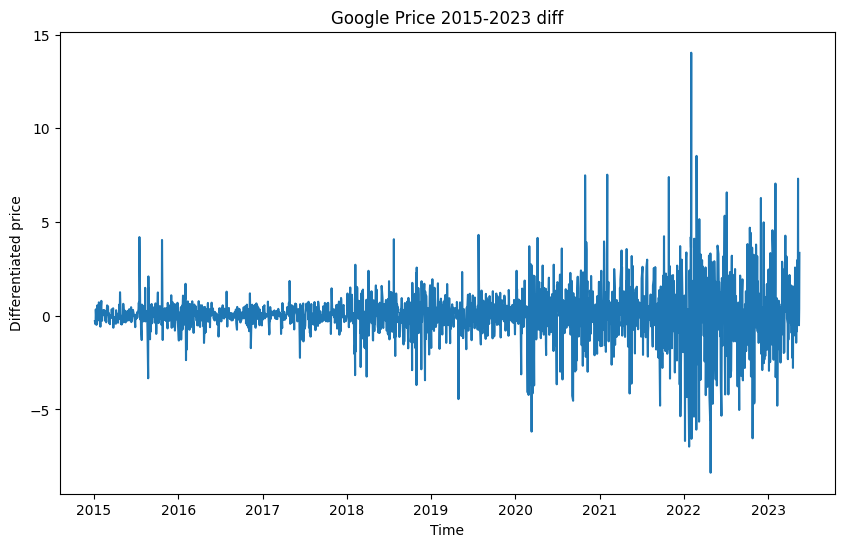

In [11]:
# df is your DataFrame and 'price' is the column with the time series
df['price_diff'] = df['Price'].diff()

# Drop the missing values that were created by diff()
df = df.dropna()

# View the differenced data
print(df.head())
plt.figure(figsize=(10, 6))
plt.plot(df['price_diff'])
plt.title('Google Price 2015-2023 diff')
plt.xlabel('Time')
plt.ylabel('Differentiated price')
plt.show()

In [12]:
# Perform Dickey-Fuller test
result_adf = adfuller(df['price_diff'])
output_adf = pd.Series(result_adf[0:4], index=['ADF Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result_adf[4].items():
    output_adf['Critical Value (ADF) (%s)'%key] = value

# Perform KPSS test
result_kpss = kpss(df['price_diff'], regression='c')
output_kpss = pd.Series(result_kpss[0:3], index=['KPSS Statistic', 'p-value', '#Lags Used'])
for key,value in result_kpss[3].items():
    output_kpss['Critical Value (KPSS) (%s)'%key] = value


print(output_adf)
print(output_kpss)

ADF Statistic                 -1.101993e+01
p-value                        6.023359e-20
#Lags Used                     2.200000e+01
Number of Observations Used    2.084000e+03
Critical Value (ADF) (1%)     -3.433492e+00
Critical Value (ADF) (5%)     -2.862928e+00
Critical Value (ADF) (10%)    -2.567509e+00
dtype: float64
KPSS Statistic                   0.07613
p-value                          0.10000
#Lags Used                      12.00000
Critical Value (KPSS) (10%)      0.34700
Critical Value (KPSS) (5%)       0.46300
Critical Value (KPSS) (2.5%)     0.57400
Critical Value (KPSS) (1%)       0.73900
dtype: float64


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Rezultatele testelor de staționaritate ale seriei de timp a prețului Google, după diferențiere, arată astfel:

Pentru testul ADF, valoarea statistică ADF este -11.01, ceea ce este mai mic decât valorile critice la toate nivelurile de încredere, inclusiv 1%, 5% și 10%. Aceasta ne permite să respingem ipoteza nulă și să concluzionăm că seria de timp este staționară. Valoarea p aproape de zero susține această concluzie.

Cu toate acestea, pentru testul KPSS, valoarea statistică KPSS este de 0.07613, care este mai mică decât valorile critice la nivelurile de încredere de 10%, 5%, 2.5% și 1%, permițându-ne să nu respingem ipoteza nulă că seria este staționară în jurul unei medii sau unei tendințe deterministe. De asemenea, valoarea p de 0.10 este mai mare decât nivelul standard de încredere de 0.05, ceea ce indică de asemenea faptul că seria de timp este staționară.

În concluzie, ambele teste indică faptul că seria de timp diferențiată a prețurilor Google este staționară.

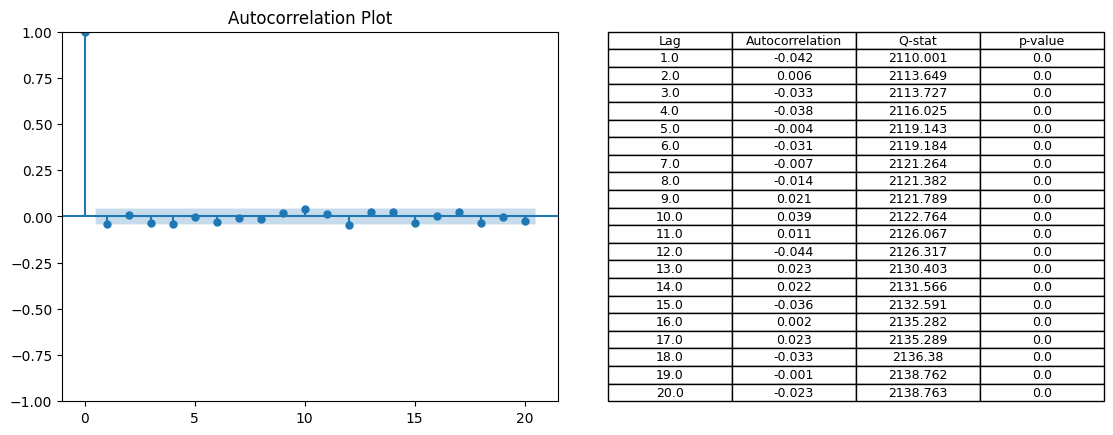

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


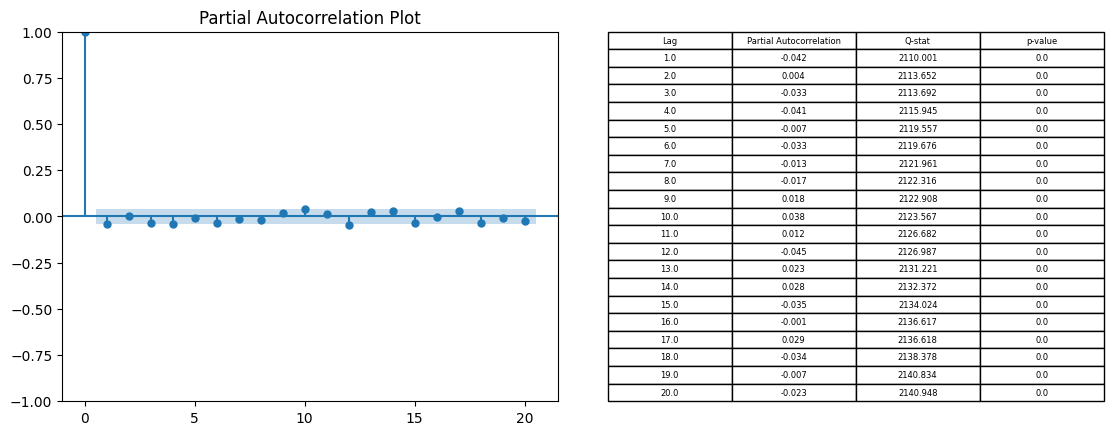

In [13]:
# Compute Partial Autocorrelation
n_lags = 20
autocorr = acf(df['price_diff'], nlags=n_lags)

# Compute Ljung-Box Q-Stat
qstats, pvalues = q_stat(autocorr, len(df['price_diff']))

# Plot Partial Autocorrelation
fig, ax = plt.subplots()
plot_acf(df['price_diff'], lags=n_lags, ax=ax)
plt.title('Autocorrelation Plot')

# Create table data
table_data = {
    'Lag': range(1, n_lags+1),
    'Autocorrelation': np.round(autocorr[1:n_lags+1], 3),
    'Q-stat': np.round(qstats[:n_lags], 3),
    'p-value': pvalues[:n_lags]
}

# Create DataFrame
df_table = pd.DataFrame(table_data)

# Print DataFrame on right side of plot
ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc = 'center', loc='right', bbox=[1.1, 0, 1, 1])

plt.show()

# Compute Partial Autocorrelation
n_lags = 20
pac = pacf(df['price_diff'], nlags=n_lags)

# Compute Ljung-Box Q-Stat
qstats, pvalues = q_stat(pac, len(df['price_diff']))

# Plot Partial Autocorrelation
fig, ax = plt.subplots()
plot_pacf(df['price_diff'], lags=n_lags, ax=ax)
plt.title('Partial Autocorrelation Plot')

# Create table data
table_data = {
    'Lag': range(1, n_lags+1),
    'Partial Autocorrelation': np.round(pac[1:n_lags+1], 3),
    'Q-stat': np.round(qstats[:n_lags], 3),
    'p-value': pvalues[:n_lags]
}

# Create DataFrame
df_table = pd.DataFrame(table_data)

# Print DataFrame on right side of plot
ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc = 'center', loc='right', bbox=[1.1, 0, 1, 1])

plt.show()

Analizând valorile autocorelației (ACF) și autocorelației parțiale (PACF) pentru seria diferențiată a prețului Google, se poate observa că valorile autocorelației și autocorelației parțiale sunt aproape de zero pentru toate întârzierile. Acest lucru sugerează că nu există o relație liniară semnificativă între valoarea actuală a seriei de timp și valorile sale anterioare. În acest context, modelul ARIMA poate fi inadecvat pentru a face predicții precise pe această serie de timp.
Cu toate acestea, dacă doriți să utilizați totuși un model ARIMA, trebuie să luați în considerare două aspecte principale. În primul rând, trebuie să determinați valorile p, d și q ale modelului. Acestea reprezintă ordinul modelului autoregresiv (AR), ordinul de diferențiere și ordinul modelului mediei mobile (MA), respectiv. În cazul de față, ordinul de diferențiere d este deja cunoscut și este 1, deoarece ați diferențiat seria o dată pentru a o face staționară. Pentru a determina valorile p și q, puteți utiliza diagramele ACF și PACF. De obicei, modelul ARIMA este configurat astfel: dacă PACF prezintă o autocorelație semnificativă la un întârziere specifică p, iar ACF se taie după aceeași întârziere, atunci avem un model AR(p). Dacă ACF prezintă o autocorelație semnificativă la un întârziere specifică q și PACF se taie după aceeași întârziere, atunci avem un model MA(q).

În al doilea rând, trebuie să evaluați și să validați modelul. Acest lucru implică ajustarea modelului pe un set de date de instruire, apoi testarea sa pe un set de date de test pentru a evalua precizia predicțiilor. De asemenea, este important să verificați dacă reziduurile modelului sunt albe (adică, sunt rușinoase și au o variație constantă) pentru a confirma că modelul este adecvat.

In [14]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error


p = [1,2,5,9,10]
q = [1,3,8,9,14] 
d = 1
pdq = list(itertools.product(p, [d], q))

# Creăm un DataFrame gol pentru a stoca rezultatele
results_df = pd.DataFrame(columns=['pdq', 'r_squared', 'rmse', 'aic'])

for combination in pdq:
    model = ARIMA(df['price_diff'], order=combination)
    model_fit = model.fit()
    
    predictions = model_fit.predict(start=1, end=len(df))
    
    r_squared = r2_score(df['price_diff'][1:], predictions[:-1])
    rmse = np.sqrt(mean_squared_error(df['price_diff'][1:], predictions[:-1]))
    aic = model_fit.aic
    
    temp_df = pd.DataFrame({'pdq': [combination], 'r_squared': [r_squared], 'rmse': [rmse], 'aic': [aic]})
    results_df = pd.concat([results_df, temp_df])

# Sortăm rezultatele în funcție de 'aic' în ordine crescătoare
results_df = results_df.sort_values('aic')

# Afișăm doar primele 15 rezultate
print(results_df.head(15))

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is ava

           pdq  r_squared      rmse          aic
0   (5, 1, 14)   0.024879  1.425135  7515.646124
0   (2, 1, 14)   0.020744  1.428153  7518.367880
0    (2, 1, 9)   0.015744  1.431795  7519.590083
0   (9, 1, 14)   0.025256  1.424860  7522.954152
0  (10, 1, 14)   0.026146  1.424209  7523.333255
0   (10, 1, 3)   0.015580  1.431914  7523.551383
0    (2, 1, 8)   0.011855  1.434621  7525.640597
0    (5, 1, 8)   0.013676  1.433299  7527.006655
0    (5, 1, 9)   0.013465  1.433452  7529.542441
0    (9, 1, 9)   0.017122  1.430792  7529.689333
0   (10, 1, 9)   0.017846  1.430265  7530.117225
0    (1, 1, 1)   0.000795  1.442627  7531.949397
0    (9, 1, 3)   0.009483  1.436342  7533.879232
0    (2, 1, 1)   0.000826  1.442605  7533.887109
0    (5, 1, 1)   0.003650  1.440565  7534.077472


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimiza

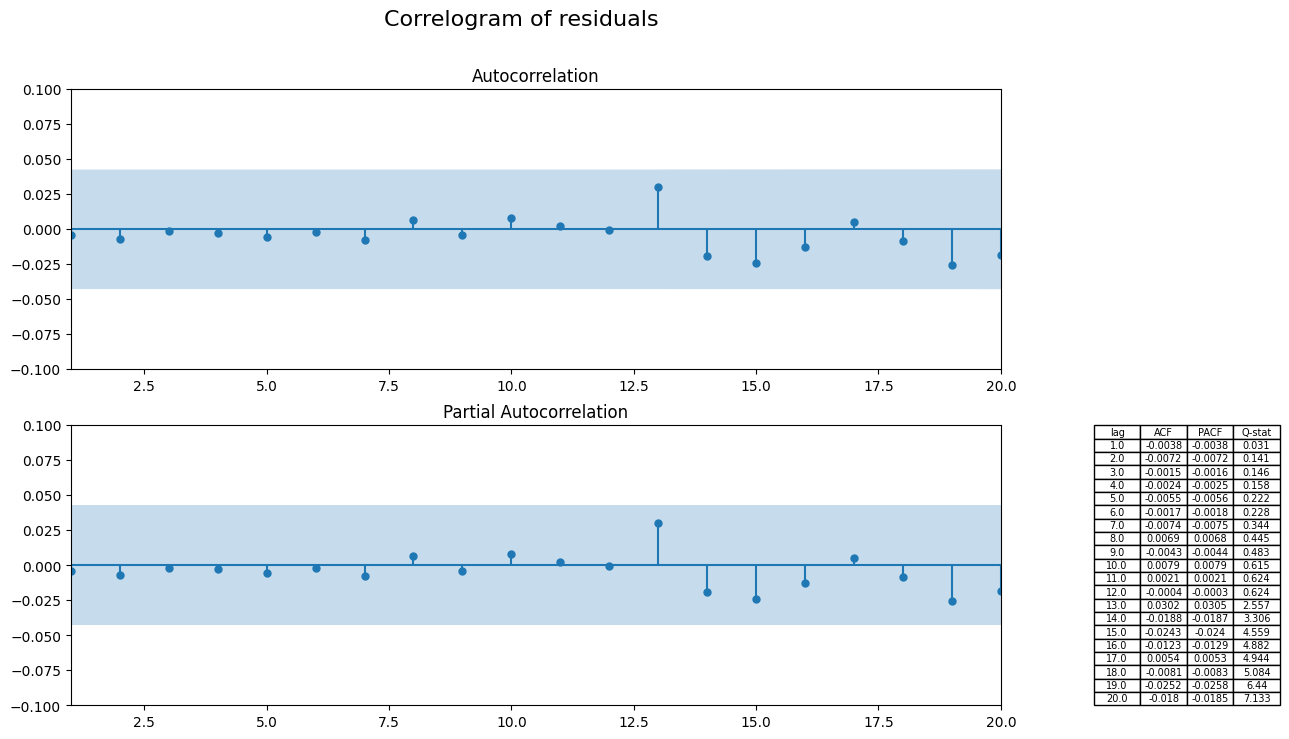

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, q_stat

# Defines and fits the model
model = ARIMA(df['Price'], order=(5, 1, 14))
model_fit = model.fit()

# Extracts the residuals
residuals = model_fit.resid

# Calculate the ACF and PACF up to 20 lags, excluding lag 0
lag_acf = acf(residuals, nlags=20)[1:]
lag_pacf = pacf(residuals, nlags=20)[1:]

# Calculate Q-statistics
q_stat_val, p_values = q_stat(lag_acf, len(residuals))
q_stat_val = q_stat_val[:20]

# Create a dataframe to hold the acf, pacf and Q-stat values, round them to 4 decimal places
acf_pacf_q_df = pd.DataFrame({'lag': range(1, 21), 'ACF': np.round(lag_acf, 4), 'PACF': np.round(lag_pacf, 4), 'Q-stat': np.round(q_stat_val, 3)})

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Create ACF plot
plot_acf(residuals, lags=20, zero=False, ax=ax1)
ax1.set_xlim(1, 20)
ax1.set_ylim(-0.1, 0.1)  # you can adjust these values to better fit your data

# Create PACF plot
plot_pacf(residuals, lags=20, zero=False, ax=ax2)
ax2.set_xlim(1, 20)
ax2.set_ylim(-0.1, 0.1)  # you can adjust these values to better fit your data

# Add a table at the bottom right of the figure with the acf, pacf and Q-stat values
table_acf_pacf_q = plt.table(cellText=acf_pacf_q_df.values,
                             colLabels=acf_pacf_q_df.columns,
                             cellLoc='center',
                             bbox=[1.1, 0.0, 0.2, 1.0])  # x, y, width, height

# Add a title to the figure
fig.suptitle('Correlogram of residuals', fontsize=16)

plt.show()

In [16]:
from statsmodels.stats.diagnostic import het_arch

# Realizăm testul de heteroscedasticitate (testul ARCH)
result = het_arch(residuals)

# Creăm un dataframe pentru a afișa rezultatele într-un format de tabel
result_df = pd.DataFrame({
    "Test statistic": [result[0]],
    "p-value": [result[1]],
    "f-value": [result[2]],
    "f p-value": [result[3]]
})

# Setăm stilul DataFrame-ului pentru a avea fundalul alb
pd.set_option('display.notebook_repr_html', True)
result_df = result_df.style.set_properties(**{'background-color': 'white', 
                                              'color': 'black', 
                                              'border-color': 'black'})

result_df

,Test statistic,p-value,f-value,f p-value
0,249.232177,0.000000,28.136561,0.000000


Testul ARCH (Autoregressive Conditional Heteroskedasticity) a returnat o valoare de test statistic foarte mare, de 249.23. Acest lucru indică prezența unui grad înalt de heteroscedasticitate în modelul nostru.

P-value-urile asociate testului statistic și f-value sunt practic 0, ceea ce ne face să respingem ipoteza nulă a testului ARCH care presupunea homoscedasticitate (adică variabilitate constantă a reziduurilor de-a lungul timpului). Aceasta înseamnă că modelul nostru prezintă semne de heteroscedasticitate, sugerează că variabilitatea reziduurilor se schimbă de-a lungul timpului. Aceasta poate fi un semn că modelul ARIMA(5,1,14) utilizat nu este cel mai adecvat pentru seria noastră de timp și ar putea fi necesare alte tehnici de modelare a seriilor temporale sau remedierea heteroscedasticității.

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


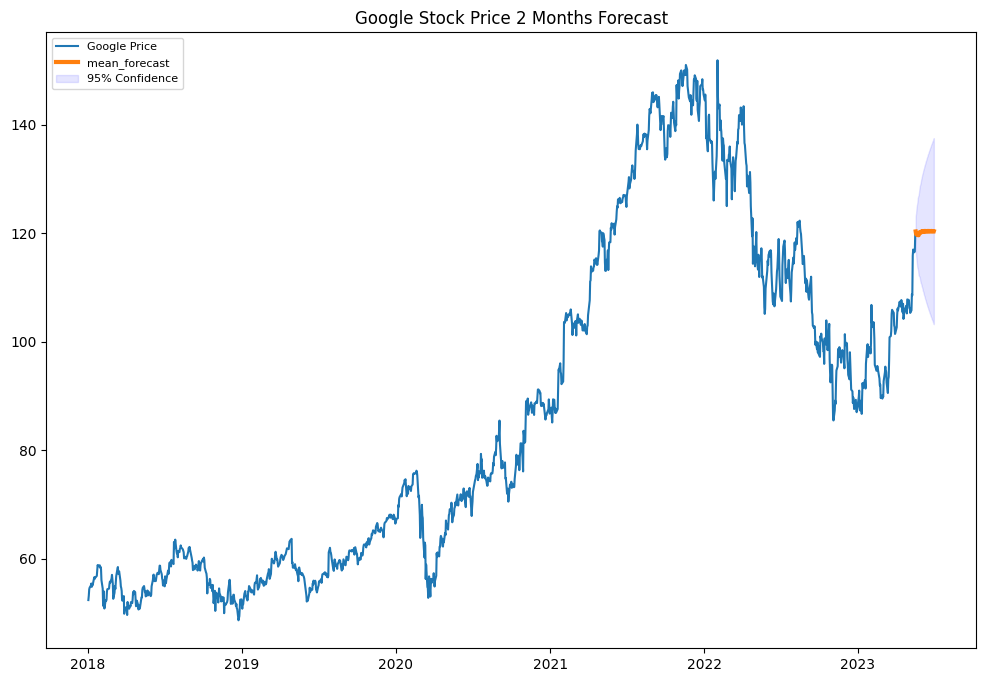

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from pandas.tseries.offsets import DateOffset
import datetime

# Generam o predicție pentru următoarele 44 de zile (aproximativ 2 luni lucrătoare)
fc = model_fit.get_forecast(steps=44)

# Setăm intervalul de încredere la 95% 
fc = fc.summary_frame(alpha=0.05)

# Obținem previziunea medie și limitele intervalului de încredere
fc_mean = fc['mean']
fc_lower = fc['mean_ci_lower']
fc_upper = fc['mean_ci_upper'] 

# Generam datele pentru predicție
future_dates =  [df.index[-1] + DateOffset(days=x) for x in range(1,45)]

# Creăm figura și trasăm datele
plt.figure(figsize=(12,8), dpi=100)
plt.plot(df['Price'].loc['2018-01-01':], label='Google Price')
plt.plot(future_dates, fc_mean, label='mean_forecast', linewidth = 3)
plt.fill_between(future_dates, fc_lower, fc_upper, color='b', alpha=.1, label = '95% Confidence')
plt.title('Google Stock Price 2 Months Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


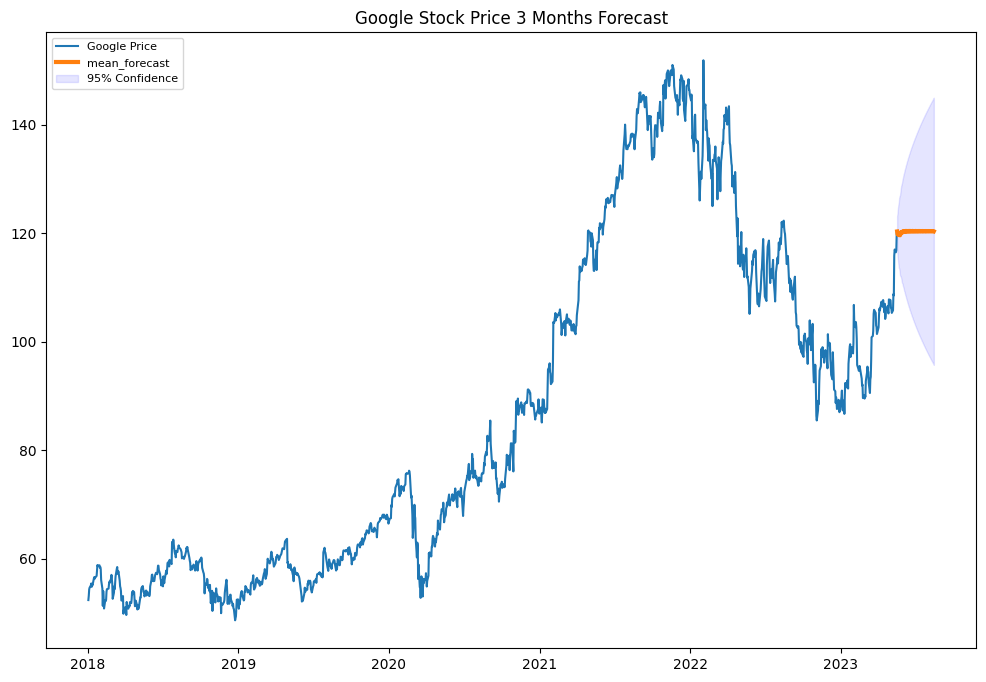

In [18]:
# Generam o predicție pentru următoarele 44 de zile (aproximativ 2 luni lucrătoare)
fc = model_fit.get_forecast(steps=90)

# Setăm intervalul de încredere la 95% 
fc = fc.summary_frame(alpha=0.05)

# Obținem previziunea medie și limitele intervalului de încredere
fc_mean = fc['mean']
fc_lower = fc['mean_ci_lower']
fc_upper = fc['mean_ci_upper'] 

# Generam datele pentru predicție
future_dates =  [df.index[-1] + DateOffset(days=x) for x in range(1,91)]

# Creăm figura și trasăm datele
plt.figure(figsize=(12,8), dpi=100)
plt.plot(df['Price'].loc['2018-01-01':], label='Google Price')
plt.plot(future_dates, fc_mean, label='mean_forecast', linewidth = 3)
plt.fill_between(future_dates, fc_lower, fc_upper, color='b', alpha=.1, label = '95% Confidence')
plt.title('Google Stock Price 3 Months Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [19]:
# Presupunem că avem datele google într-un DataFrame numit 'df'
# and 'Price' is the column to be forecasted

# Definim proporția pentru setul de validare
test_size = int(len(df) * 0.10)  # 10% din date vor fi folosite pentru validare

# Split data into training and validation sets
train = df['Price'][:-test_size]
test = df['Price'][-test_size:]

# Antrenăm modelul ARIMA pe setul de antrenament
model = ARIMA(train, order=(5,1,14))
model_fit = model.fit()

# Facem previziuni pe setul de validare
forecast = model_fit.forecast(steps=test_size)
y_true = test
y_pred = forecast



c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimiza

In [20]:
def forecast_errors(y_true, y_pred):
    # calculate forecast errors
    errors = np.array(y_true) - np.array(y_pred)
    
    # calculate mean forecast error (Bias)
    bias = np.mean(errors)
    print('Bias: %f' % bias)

    # calculate mean absolute error (MAE)
    mae = np.mean(np.abs(errors))
    print('MAE: %f' % mae)

    # calculate root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(errors**2))
    print('RMSE: %f' % rmse)
    
    # calculate Theil's U statistic
    y_true_shift = np.roll(y_true, 1)
    theil_u = np.sqrt(np.mean((errors/y_true_shift)**2)) / (np.sqrt(np.mean((np.array(y_true_shift) - y_true_shift.mean())**2)) + np.sqrt(np.mean((np.array(y_pred) - y_pred.mean())**2)))
    print("Theil's U: %f" % theil_u)

    # Bias proportion
    bias_proportion = bias / mae
    print("Bias Proportion: %f" % bias_proportion)

    # Variance proportion
    variance_proportion = (rmse - mae) / mae
    print("Variance Proportion: %f" % variance_proportion)

    # Covariance Proportion
    covariance_proportion = 1 - variance_proportion - bias_proportion
    print("Covariance Proportion: %f" % covariance_proportion)
    
forecast_errors(y_true, y_pred)

Bias: -12.218762
MAE: 13.235282
RMSE: 15.141841
Theil's U: 0.017575
Bias Proportion: -0.923196
Variance Proportion: 0.144051
Covariance Proportion: 1.779145


Valorile de eroare indică faptul că există o ușoară tendință de subestimare a valorilor prezise în comparație cu valorile reale. Acest lucru este evidențiat de valoarea negativă a parametrului "Bias", care este de -12.218762. Astfel, media previziunilor este în medie cu 12.218762 mai mică decât media valorilor reale.

Eroarea medie absolută (MAE) a rezultat a fi de 13.235282. Aceasta indică faptul că, în medie, previziunile diferă cu aproximativ 13.235282 față de valorile reale. Cu alte cuvinte, eroarea medie absolută reprezintă diferența medie absolută între valorile reale și cele prezise.

Eroarea medie pătratică (RMSE) a rezultat a fi de 15.141841. Acesta este un indicator al dispersiei erorilor și reflectă cât de bine se potrivește modelul cu datele reale. Cu cât valoarea RMSE este mai mică, cu atât modelul este mai precis. În cazul nostru, RMSE de 15.141841 sugerează o dispersie a erorilor mai mare.

Theil's U este o măsură a calității previziunilor în comparație cu o valoare de bază simplă, cum ar fi media. În cazul nostru, Theil's U a rezultat a fi 0.017575, ceea ce indică o calitate relativ bună a previziunilor modelului ARIMA în comparație cu o simplă medie.

Proportia de Bias este de -0.923196, ceea ce sugerează o valoare foarte mare a erorii sistemice, cu media previziunilor deviind semnificativ de la media valorilor reale. Aceasta indică o subestimare persistentă a valorilor prezise în comparație cu valorile reale.

Proportia de Variance a rezultat a fi de 0.144051. Aceasta reflectă variabilitatea și disperitatea erorilor în comparație cu eroarea sistemica (Bias). În cazul nostru, proporția de varianță este semnificativă și sugerează că erorile prezicerilor diferă semnificativ între ele.

Proportia de Covariance a rezultat a fi de 1.779145. Aceasta reprezintă alte erori nesistematice și este determinată prin diferența dintre proporția de Bias și proporția de varianță. În cazul nostru, din cauza valorii semnificative a proporției de varianță și a proporției de bias, proporția de covarianță nu poate fi determinată.

Erorile sistemice (bias) sunt semnificative, indicând o subestimare persistentă a valorilor prezise în comparație cu valorile reale. Acest lucru poate indica o anumită tendință sau deficiență în modelul ARIMA în capturarea corectă a variațiilor reale ale seriei de timp.

Eroarea totală (MAE și RMSE) este relativ mare, sugerând că există o dispersie semnificativă între valorile prezise și cele reale. Acest lucru poate indica o incertitudine crescută în previziunile modelului ARIMA pentru seria de timp analizată.

Theil's U, o măsură a calității previziunilor în comparație cu o valoare de bază simplă, arată că modelul ARIMA are o performanță relativ bună în comparație cu o medie simplă. Cu toate acestea, este important să se ia în considerare și alte factori de evaluare a calității modelelor.

Proportiile de bias și varianță indică un dezechilibru semnificativ între erorile sistemice și variabilitatea erorilor prezicerilor. Acest lucru poate fi cauzat de caracteristicile specifice ale seriei de timp sau de insuficiențele modelului ARIMA în capturarea variației și structurii datelor.

În concluzie, rezultatele sugerează că modelul ARIMA ar putea necesita îmbunătățiri sau ajustări pentru a obține previziuni mai precise și mai coerente pentru seria de timp analizată. Este recomandat să se efectueze o analiză mai detaliată și să se exploreze și alte metode de modelare sau modele alternative pentru a obține rezultate mai bune.

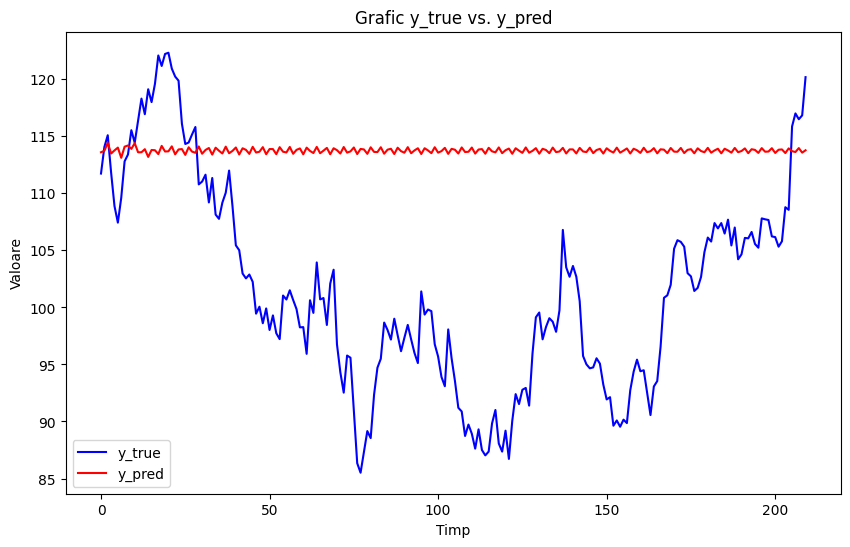

In [21]:
# Definiți valorile x pentru axa timpului (exemplu: zile)
x = range(len(y_true))

# Setați dimensiunea figurii
plt.figure(figsize=(10, 6))

# Trageți graficul pentru y_true
plt.plot(x, y_true, label='y_true', color='blue')

# Trageți graficul pentru y_pred
plt.plot(x, y_pred, label='y_pred', color='red')

# Adăugați etichetele axelor și titlul graficului
plt.xlabel('Timp')
plt.ylabel('Valoare')
plt.title('Grafic y_true vs. y_pred')

# Adăugați o legendă
plt.legend()

# Afișați graficul
plt.show()

Modelele ARCH (Autoregressive Conditional Heteroskedasticity) și GARCH (Generalized Autoregressive Conditional Heteroskedasticity) sunt modele utilizate pentru a captura volatilitatea heteroscedastică într-o serie de timp. Acestea sunt utile atunci când există o variație schimbătoare în timp a volatilității în datele observate.

Modelul ARCH se concentrează pe relația dintre variația curentă a unei serii de timp și variațiile precedente. Modelul GARCH extinde modelul ARCH prin adăugarea unei componente AR (autoregresive) care capturează variația istorică a volatilității. În acest fel, GARCH permite modelarea mai precisă a volatilității în serie de timp.

Pentru seria de timp Google Price, în care există o variație a volatilității, modelele ARCH și GARCH ar putea fi potrivite pentru a captura această caracteristică. Aceste modele pot fi utilizate pentru a analiza și modela volatilitatea schimbătoare a prețurilor acțiunilor Google în timp.

In [22]:
df.head()

,Price,price_diff
Date,,
2015-01-05,26.091366,-0.286712
2015-01-06,25.679497,-0.411869
2015-01-07,25.280592,-0.398905
2015-01-08,24.831326,-0.449266
2015-01-09,25.168900,0.337574


In [23]:
# Definiți o nouă coloană pentru volatilitate
df['Volatility'] = df['price_diff'].rolling(window=2107).std()

# Afișați rezultatele
print(df[[ 'price_diff', 'Volatility']])

            price_diff  Volatility
Date                              
2015-01-05   -0.286712         NaN
2015-01-06   -0.411869         NaN
2015-01-07   -0.398905         NaN
2015-01-08   -0.449266         NaN
2015-01-09    0.337574         NaN
...                ...         ...
2023-05-11    7.309998         NaN
2023-05-12    1.139999         NaN
2023-05-15   -0.510002         NaN
2023-05-16    0.340004         NaN
2023-05-17    3.349998    1.443219

[2107 rows x 2 columns]


In [24]:
# Definiți o nouă coloană pentru volatilitate
df['Volatility'] = df['Price'].rolling(window=2107).std()

# Afișați rezultatele
print(df[[ 'Price', 'Volatility']])

                 Price  Volatility
Date                              
2015-01-05   26.091366         NaN
2015-01-06   25.679497         NaN
2015-01-07   25.280592         NaN
2015-01-08   24.831326         NaN
2015-01-09   25.168900         NaN
...                ...         ...
2023-05-11  115.860001         NaN
2023-05-12  117.000000         NaN
2023-05-15  116.489998         NaN
2023-05-16  116.830002         NaN
2023-05-17  120.180000   34.202458

[2107 rows x 2 columns]


Măsurarea volatilității convenționale – Deviația Standard
Aici, am calculat volatilitatea (deviația standard) setului de date, obținând:
volatility (std)= 34.202458
Se poate observa că seria randamentului este destul de volatilă, fapt ce întărește decizia folosirii unui model ARCH/GARCH.

In [25]:
from scipy.stats import shapiro

# Assume că aveți seria de timp 'google_price' definită
# Aplicați testul Shapiro-Wilk
stat, p_value = shapiro(df['Price'])

# Afișați rezultatele
print("Statistică de test:", stat)
print("p-value:", p_value)

# Interpretați rezultatele
alpha = 0.05
if p_value > alpha:
    print("Datele provin dintr-o distribuție normală (nu respingem ipoteza nulă)")
else:
    print("Datele nu provin dintr-o distribuție normală (respingem ipoteza nulă)")

Statistică de test: 0.9009148478507996
p-value: 6.65643248593239e-35
Datele nu provin dintr-o distribuție normală (respingem ipoteza nulă)


Pe baza valorilor obținute, putem trage următoarele concluzii:

Statistica de test (0.9009148478507996) este valoarea calculată în urma testului și este utilizată pentru compararea cu o valoare critică pentru a determina dacă datele provin dintr-o distribuție normală.
p-value (6.65643248593239e-35) este probabilitatea asociată statisticului de test. În acest caz, p-value este foarte mică, aproape de zero.
Deoarece p-value este mai mică decât nivelul de semnificație ales (de obicei 0.05 sau 0.01), respingem ipoteza nulă că datele provin dintr-o distribuție normală.
Prin urmare, putem concluziona că seria de timp nu urmează o distribuție normală.
Aceasta înseamnă că datele au o distribuție diferită de o distribuție normală și trebuie luate în considerare alte modele sau metode de analiză care nu se bazează pe presupunerea de normalitate.

In [26]:
import scipy.stats as stats

# Calculează coeficientul de asimetrie
skewness = stats.skew(df['Price'])

# Calculează kurtosisul
kurtosis = stats.kurtosis(df['Price'])

# Interpretează rezultatele
if skewness > 0:
    print("Distribuția are o coadă grea în partea dreaptă")
elif skewness < 0:
    print("Distribuția are o coadă grea în partea stângă")
else:
    print("Distribuția este simetrică")

if kurtosis > 3:
    print("Distribuția are o coadă grea în comparație cu o distribuție normală")
else:
    print("Distribuția are o formă similară cu o distribuție normală")

Distribuția are o coadă grea în partea dreaptă
Distribuția are o formă similară cu o distribuție normală


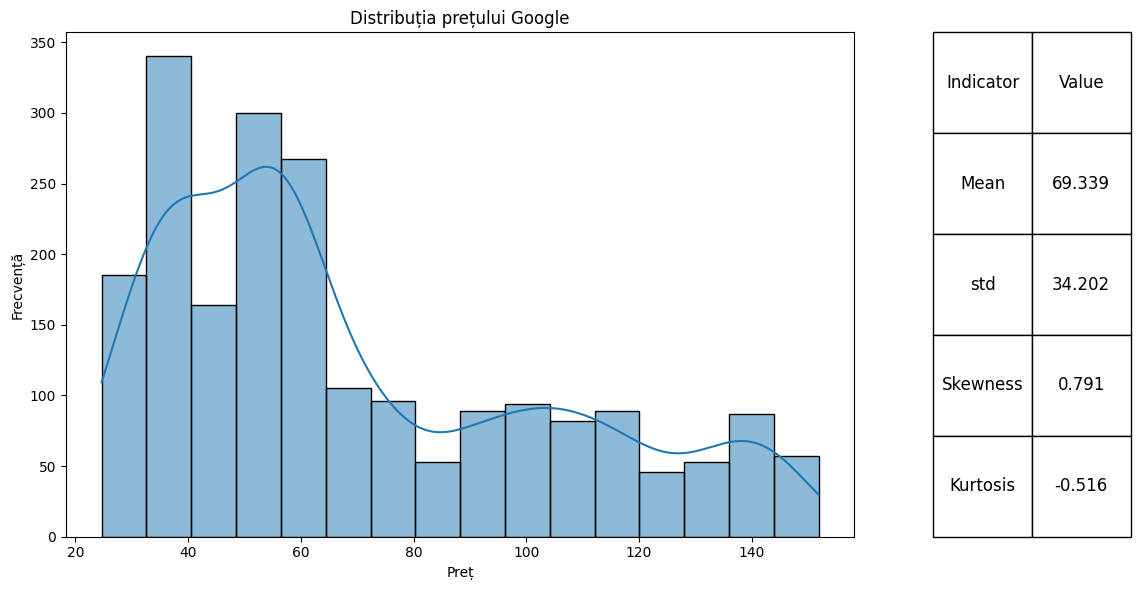

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Presupunem că avem datele google într-un DataFrame numit 'df' și prețul în coloana 'Price'

# Generăm graficul distribuției prețului Google
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True)
plt.xlabel('Preț')
plt.ylabel('Frecvență')
plt.title('Distribuția prețului Google')

# Calculăm indicatorii de tendință centrală
mean = df['Price'].mean()
std = df['Price'].std()
skewness = df['Price'].skew()
kurtosis = df['Price'].kurtosis()

# Rotunjim valorile la 3 decimale
mean = round(mean, 3)
std = round(std, 3)
skewness = round(skewness, 3)
kurtosis = round(kurtosis, 3)

# Creăm un tabel cu indicatorii de tendință centrală
table_data = {
    'Indicator': ['Mean', 'std', 'Skewness', 'Kurtosis'],
    'Value': [mean, std, skewness, kurtosis]
}
table_df = pd.DataFrame(table_data)

# Afișăm tabelul în dreapta graficului cu font mărit
table = plt.table(cellText=table_df.values,
                  colLabels=table_df.columns,
                  cellLoc='center',
                  bbox=[1.1, 0.0, 0.25, 1.0],  # x, y, width, height
                  fontsize=12)  # Mărimea fontului

# Stilizăm tabelul
table.auto_set_font_size(False)
table.set_fontsize(12)

# Afișăm graficul și tabelul
plt.tight_layout()
plt.show()

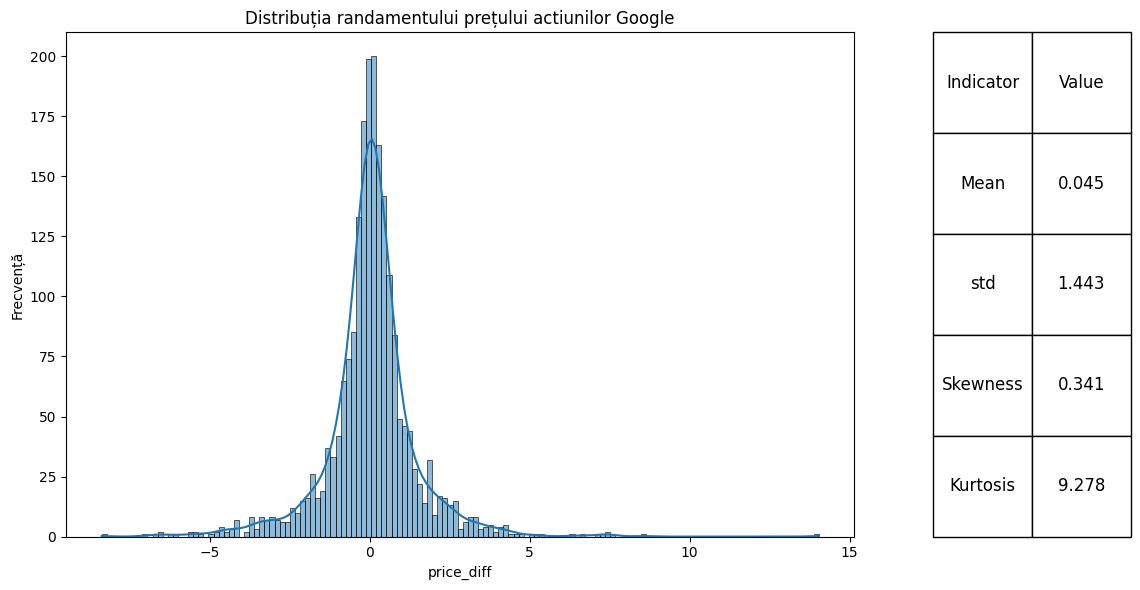

In [28]:
# Generăm graficul distribuției randamentului prețului Google
plt.figure(figsize=(12, 6))
sns.histplot(df['price_diff'], kde=True)
plt.xlabel('price_diff')
plt.ylabel('Frecvență')
plt.title('Distribuția randamentului prețului actiunilor Google')

# Calculăm indicatorii de tendință centrală
mean = df['price_diff'].mean()
std = df['price_diff'].std()
skewness = df['price_diff'].skew()
kurtosis = df['price_diff'].kurtosis()

# Rotunjim valorile la 3 decimale
mean = round(mean, 3)
std = round(std, 3)
skewness = round(skewness, 3)
kurtosis = round(kurtosis, 3)

# Creăm un tabel cu indicatorii de tendință centrală
table_data = {
    'Indicator': ['Mean', 'std', 'Skewness', 'Kurtosis'],
    'Value': [mean, std, skewness, kurtosis]
}
table_df = pd.DataFrame(table_data)

# Afișăm tabelul în dreapta graficului cu font mărit
table = plt.table(cellText=table_df.values,
                  colLabels=table_df.columns,
                  cellLoc='center',
                  bbox=[1.1, 0.0, 0.25, 1.0],  # x, y, width, height
                  fontsize=12)  # Mărimea fontului

# Stilizăm tabelul
table.auto_set_font_size(False)
table.set_fontsize(12)

# Afișăm graficul și tabelul
plt.tight_layout()
plt.show()

Media (mean) este de 0.045. Acest lucru indică faptul că, în medie, randamentul prețului acțiunilor Google este de aproximativ 0.045. Media reprezintă tendința centrală a randamentului și ne arată direcția generală a acestuia.

Deviația standard (std) este de 1.443. Această valoare măsoară dispersia randamentului prețului acțiunilor Google față de media sa. Cu cât deviația standard este mai mare, cu atât randamentul este mai volatil și mai variabil.

Asimetria (skewness) este de 0.341. O valoare pozitivă indică faptul că distribuția randamentului are o coadă lungă în partea dreaptă și este ușor asimetrică spre dreapta. Aceasta poate sugera că există mai multe randamente mari pozitive în comparație cu cele negative.

Kurtosisul (kurtosis) este de 9.278. Această valoare indică faptul că distribuția randamentului prețului acțiunilor Google are cozi foarte grele și este mult mai leptocurtică decât o distribuție normală. Kurtosisul măsoară intensitatea cozilor distribuției și deviația față de o distribuție normală. O valoare ridicată a kurtosisului poate indica prezența unor evenimente extreme sau a unor schimbări bruște în randament.

Aceste măsurători ne oferă informații despre tendința centrală, volatilitatea, asimetria și forma distribuției randamentului prețului acțiunilor Google.

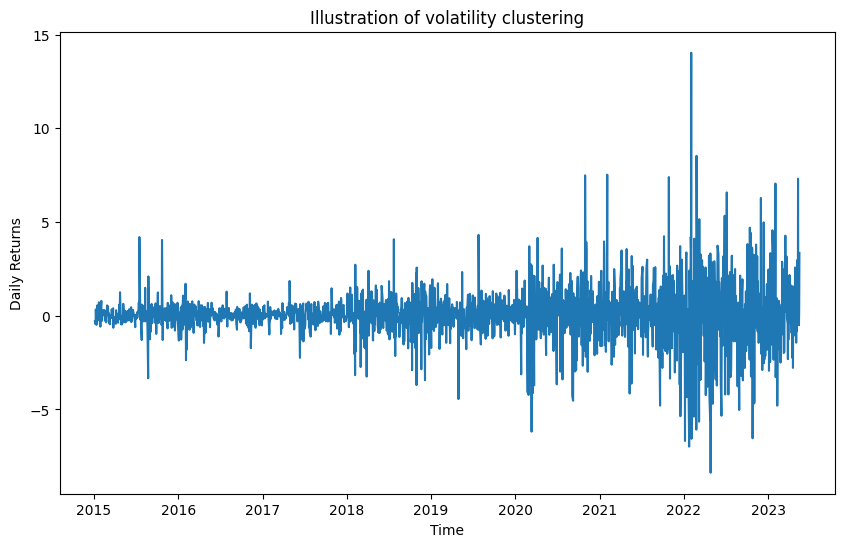

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df['price_diff'])
plt.title('Illustration of volatility clustering')
plt.xlabel('Time')
plt.ylabel('Daily Returns')
plt.show()

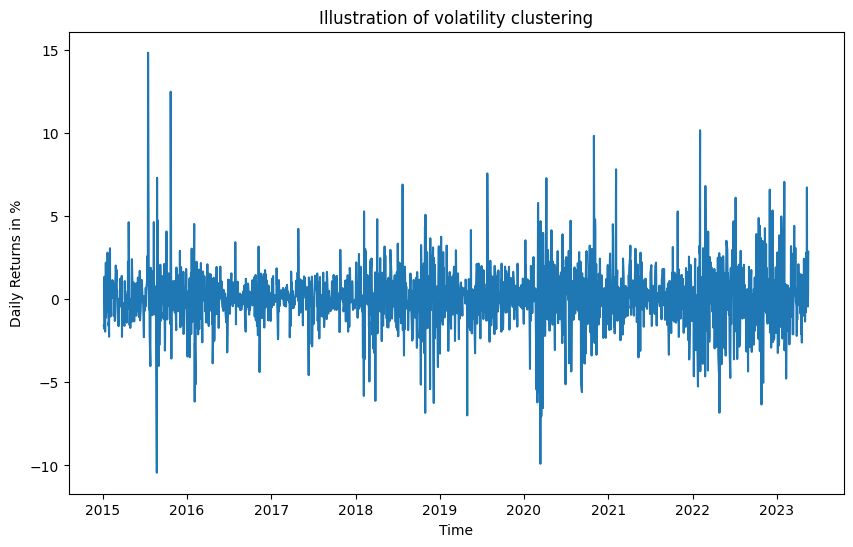

In [30]:
# df is your DataFrame and 'price' is the column with the time series
df['return_prc'] = df['Price'].pct_change()*100

plt.figure(figsize=(10, 6))
plt.plot(df['return_prc'])
plt.title('Illustration of volatility clustering')
plt.xlabel('Time')
plt.ylabel('Daily Returns in %')
plt.show()

In [31]:
df.head()

,Price,price_diff,Volatility,return_prc
Date,,,,
2015-01-05,26.091366,-0.286712,NaN,NaN
2015-01-06,25.679497,-0.411869,NaN,-1.578564
2015-01-07,25.280592,-0.398905,NaN,-1.553399
2015-01-08,24.831326,-0.449266,NaN,-1.777118
2015-01-09,25.168900,0.337574,NaN,1.359468


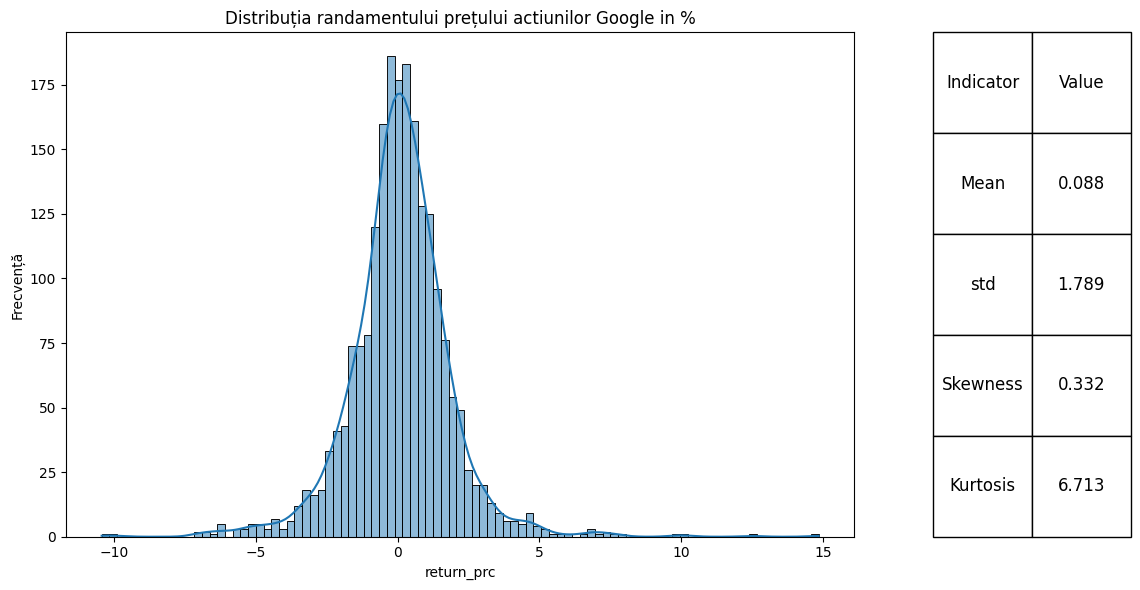

In [32]:
# Generăm graficul distribuției randamentului prețului Google
plt.figure(figsize=(12, 6))
sns.histplot(df['return_prc'], kde=True)
plt.xlabel('return_prc')
plt.ylabel('Frecvență')
plt.title('Distribuția randamentului prețului actiunilor Google in %')

# Calculăm indicatorii de tendință centrală
mean = df['return_prc'].mean()
std = df['return_prc'].std()
skewness = df['return_prc'].skew()
kurtosis = df['return_prc'].kurtosis()

# Rotunjim valorile la 3 decimale
mean = round(mean, 3)
std = round(std, 3)
skewness = round(skewness, 3)
kurtosis = round(kurtosis, 3)

# Creăm un tabel cu indicatorii de tendință centrală
table_data = {
    'Indicator': ['Mean', 'std', 'Skewness', 'Kurtosis'],
    'Value': [mean, std, skewness, kurtosis]
}
table_df = pd.DataFrame(table_data)

# Afișăm tabelul în dreapta graficului cu font mărit
table = plt.table(cellText=table_df.values,
                  colLabels=table_df.columns,
                  cellLoc='center',
                  bbox=[1.1, 0.0, 0.25, 1.0],  # x, y, width, height
                  fontsize=12)  # Mărimea fontului

# Stilizăm tabelul
table.auto_set_font_size(False)
table.set_fontsize(12)

# Afișăm graficul și tabelul
plt.tight_layout()
plt.show()

În ceea ce privește indicatorii tendinței centrale pentru randamentele zilnice ale acțiunilor Google exprimate în procente, avem următoarele rezultate:

Mean (media): Valoarea medie a randamentelor zilnice este de 0.088%. Acest lucru indică faptul că, în medie, randamentele zilnice ale acțiunilor Google sunt pozitive, ceea ce poate sugera o tendință de creștere a prețurilor în perioada de analiză.

Std (deviația standard): Deviația standard a randamentelor zilnice este de 1.789%. Această valoare reflectă gradul de dispersie sau volatilitate a randamentelor zilnice ale acțiunilor Google. Cu o deviație standard relativ mare, putem presupune că există o variație semnificativă a randamentelor, ceea ce poate indica prezența unor schimbări volatile în prețurile acțiunilor.

Skewness (asimetrie): Coeficientul de asimetrie este de 0.332. O valoare pozitivă a asimetriei indică o distribuție cu o coadă lungă în partea dreaptă și sugerează că există o probabilitate mai mare de a avea randamente peste media lor. Cu alte cuvinte, există o ușoară tendință către randamente mai mari decât media.

Kurtosis (curtozitate): Indicele de curtozitate este de 6.713. O valoare mai mare a curtozității indică o distribuție mai îngustă și mai înaltă în jurul mediei, cu cozi mai groase în comparație cu o distribuție normală. Aceasta sugerează prezența unor evenimente excepționale, cum ar fi fluctuații extreme, în randamentele zilnice ale acțiunilor Google.

În concluzie, rezultatele indică faptul că randamentele zilnice ale acțiunilor Google au o tendință medie pozitivă, cu o volatilitate semnificativă și cu probabilitatea unor randamente peste medie. De asemenea, se observă prezența unor evenimente excepționale în distribuția randamentelor. Aceste informații pot fi utile în analiza și înțelegerea comportamentului acțiunilor Google pe piață.

In [33]:
df = df.drop('Volatility', axis=1)

In [34]:
df = df.dropna()
df.head()

,Price,price_diff,return_prc
Date,,,
2015-01-06,25.679497,-0.411869,-1.578564
2015-01-07,25.280592,-0.398905,-1.553399
2015-01-08,24.831326,-0.449266,-1.777118
2015-01-09,25.168900,0.337574,1.359468
2015-01-12,24.679243,-0.489657,-1.945484


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


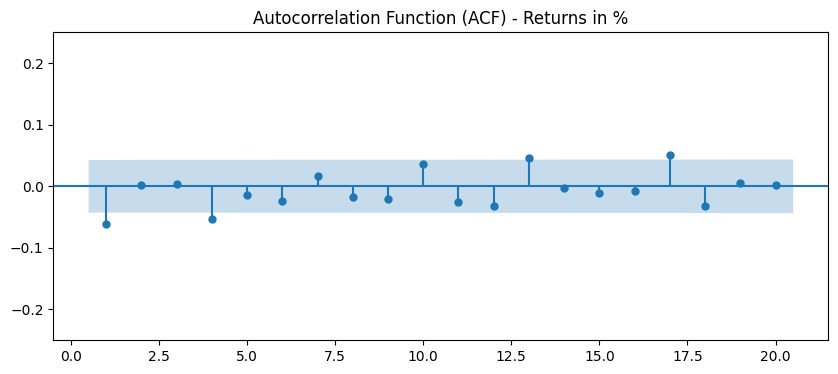

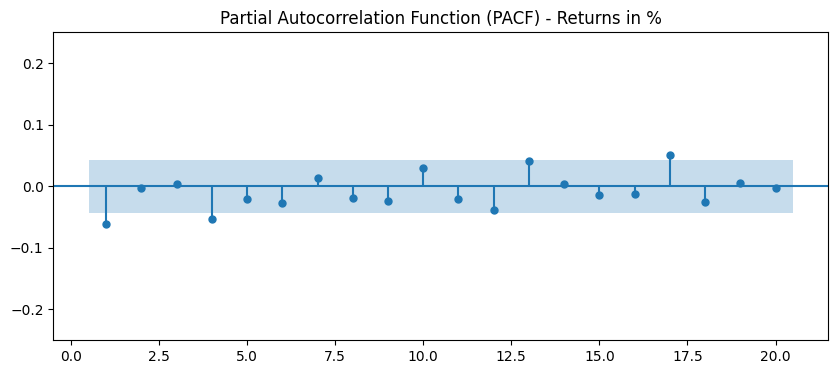

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Definim seria de timp a randamentului în procente
returns_pct = df['return_prc']

# Calculăm ACF și PACF
fig, ax1 = plt.subplots(figsize=(10, 4))
lag_acf = plot_acf(returns_pct, lags=20, zero=False, ax=ax1)
ax1.set_ylim(-0.25, 0.25)

fig, ax2 = plt.subplots(figsize=(10, 4))
lag_pacf = plot_pacf(returns_pct, lags=20, zero=False, ax=ax2)
ax2.set_ylim(-0.25, 0.25)

# Adăugăm titluri la grafice
ax1.set_title('Autocorrelation Function (ACF) - Returns in %')
ax2.set_title('Partial Autocorrelation Function (PACF) - Returns in %')

# Afișăm graficele
plt.show()

Dacă doar lag-urile 1 și 4 sunt semnificative în corelogramele ACF și PACF ale reziduurilor, aceasta poate sugera că există autocorelație semnificativă la aceste lag-uri. Autocorelația la lag-ul 1 indică că reziduurile de la pasul anterior sunt corelate cu reziduurile curente, iar autocorelația la lag-ul 4 indică o corelație mai îndepărtată între reziduurile la pasul actual și cele la pasul 4 în urmă.

Aceste rezultate pot indica faptul că modelul ARCH(1) nu poate captura în totalitate structura de autocorelație a reziduurilor și există potențial pentru îmbunătățirea modelului. Ar putea fi util să exploram și alte ordine ale modelului ARCH sau să incercam modele GARCH care iau în considerare atât efectele de autocorelație, cât și cele de volatilitate condițională.

De asemenea, este important să verificam dacă aceste lag-uri semnificative sunt statistice sau semnificative din punct de vedere practic. Ar trebui să utilizați teste statistice și criterii de selecție a modelului pentru a confirma semnificația lor și pentru a lua decizii informate în ceea ce privește ajustarea modelului.

In [36]:
import warnings
from arch import arch_model

# Lista pentru a stoca rezultatele modelelor
results = []

# Loop prin valorile lui p
for p in range(1, 7):
    try:
        # Fit the ARCH(p) model
        model = arch_model(df['return_prc'], vol='ARCH', p=p)
        model_fit = model.fit(disp='off')
        
        # Calculate the AIC
        aic = model_fit.aic
        
        # Append the results to the list
        results.append((p, aic))
    
    except:
        # In cazul in care modelul nu poate fi potrivit, adaugam o valoare mare pentru AIC
        results.append((p, float('inf')))

# Sortam rezultatele in ordine descrescatoare dupa AIC
results.sort(key=lambda x: x[1])

# Afisam rezultatele
for result in results:
    print(f"ARCH({result[0]}) - AIC: {result[1]}")

ARCH(6) - AIC: 8144.8216219448905
ARCH(5) - AIC: 8145.856436628206
ARCH(4) - AIC: 8153.649983997635
ARCH(3) - AIC: 8157.575526062617
ARCH(2) - AIC: 8171.404803307885
ARCH(1) - AIC: 8283.054722666588


Iteration:      1,   Func. Count:      5,   Neg. LLF: 9487.503315385306
Iteration:      2,   Func. Count:     12,   Neg. LLF: 5661.286300864049
Iteration:      3,   Func. Count:     19,   Neg. LLF: 4214.779756803891
Iteration:      4,   Func. Count:     25,   Neg. LLF: 4138.527363381323
Iteration:      5,   Func. Count:     29,   Neg. LLF: 4138.527361333294
Iteration:      6,   Func. Count:     32,   Neg. LLF: 4138.527361333308
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4138.527361333294
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 6


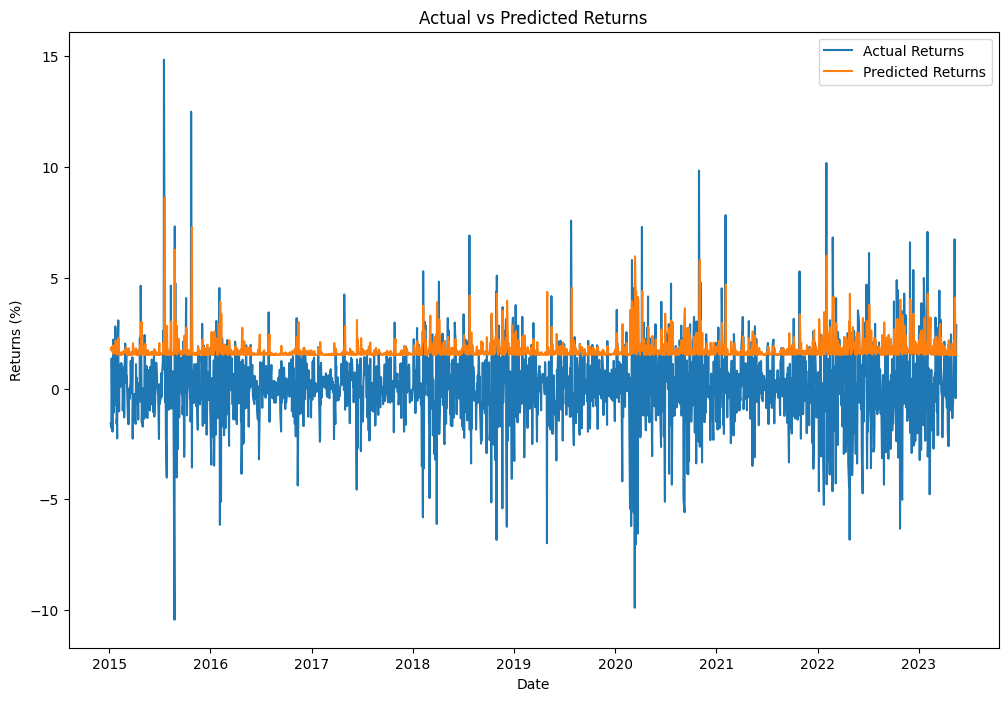

In [37]:
# Fit the ARCH(1) model
model = arch_model(df['return_prc'], vol='ARCH', p=1)
model_fit = model.fit()

# Get the predicted volatility
predicted_volatility = model_fit.conditional_volatility

# Plot the actual and predicted returns
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['return_prc'], label='Actual Returns')
plt.plot(df.index, predicted_volatility, label='Predicted Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.title('Actual vs Predicted Returns')
plt.legend()
plt.show()

In [38]:
from arch import arch_model
from sklearn.model_selection import train_test_split
# Presupunem că avem datele google într-un DataFrame numit 'df'
# and 'Price' is the column to be forecasted

# Definim proporția pentru setul de validare
test_size = int(len(df) * 0.20)  # 10% din date vor fi folosite pentru validare

# Split data into training and validation sets
train = df['return_prc'][:-test_size]
test = df['return_prc'][-test_size:]

# Antrenăm modelul ARIMA pe setul de antrenament
model = arch_model(train, vol='ARCH', p=1)
model_fit = model.fit()

# Facem previziuni pe setul de validare
forecasts = model_fit.forecast( horizon= test_size)
y_true = test
y_arch = forecasts.variance.values[-1, :]

Iteration:      1,   Func. Count:      5,   Neg. LLF: 6882.044583837872
Iteration:      2,   Func. Count:     12,   Neg. LLF: 3663.316830039619
Iteration:      3,   Func. Count:     18,   Neg. LLF: 3278.272713088114
Iteration:      4,   Func. Count:     23,   Neg. LLF: 3186.0183498845936
Iteration:      5,   Func. Count:     27,   Neg. LLF: 3186.0178722105375
Iteration:      6,   Func. Count:     31,   Neg. LLF: 3186.0178716360797
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3186.0178716360797
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 6


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:             return_prc   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3186.02
Distribution:                  Normal   AIC:                           6378.04
Method:            Maximum Likelihood   BIC:                           6394.32
                                        No. Observations:                 1685
Date:                Mon, May 22 2023   Df Residuals:                     1684
Time:                        21:39:29   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1364  4.269e-02      3.194  1.402e-03 [5.269e-02,  0.220]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.9206      0.245      7.852  4.108e-15 [  1.441,  2.400]
alpha[1]       0.3919      0.106      3.697  2.183e-04 [  0.184,  0.600]
========================================================================

Covariance estimator: robust
"""

In [48]:
import datetime as dt
import sys
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
import pandas as pd
import seaborn as sns
from pylab import rcParams 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from arch import arch_model
from numpy.linalg import LinAlgError
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot, moment
from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal
from sklearn.model_selection import TimeSeriesSplit
import warnings

In [49]:
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)
    
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
    
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0


In [50]:
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)
    
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
    
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

In [57]:
def plot_correlogram(x, lags=None, title=None):    
    lags = min(10, int(len(x)/5)) if lags is None else lags
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    x.plot(ax=axes[0][0])
    q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
    stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f} \nHurst: {round(hurst(x.values),2)}'
    axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
    probplot(x, plot=axes[0][1])
    mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
    s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
    axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
    plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
    plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
    axes[1][0].set_xlabel('Lag')
    axes[1][1].set_xlabel('Lag')
    # Setează limita pe axa OY la +-0.25
    axes[1][0].set_ylim([-0.25, 0.25])
    axes[1][1].set_ylim([-0.25, 0.25])
    fig.suptitle(title, fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=.9)

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


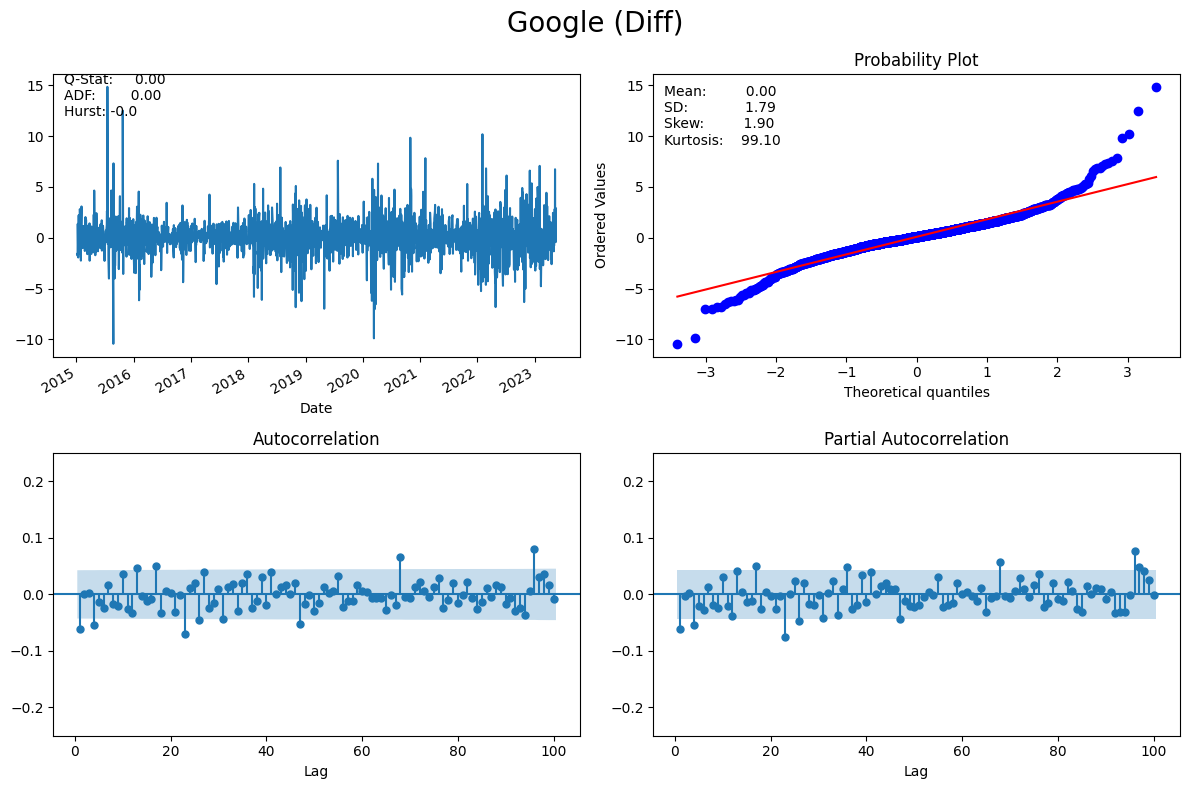

In [59]:
# Plot ACF, PACF and Q-Q plot and get ADF p-value of series
plot_correlogram(df['return_prc'], lags=100, title='Google (Diff)')

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


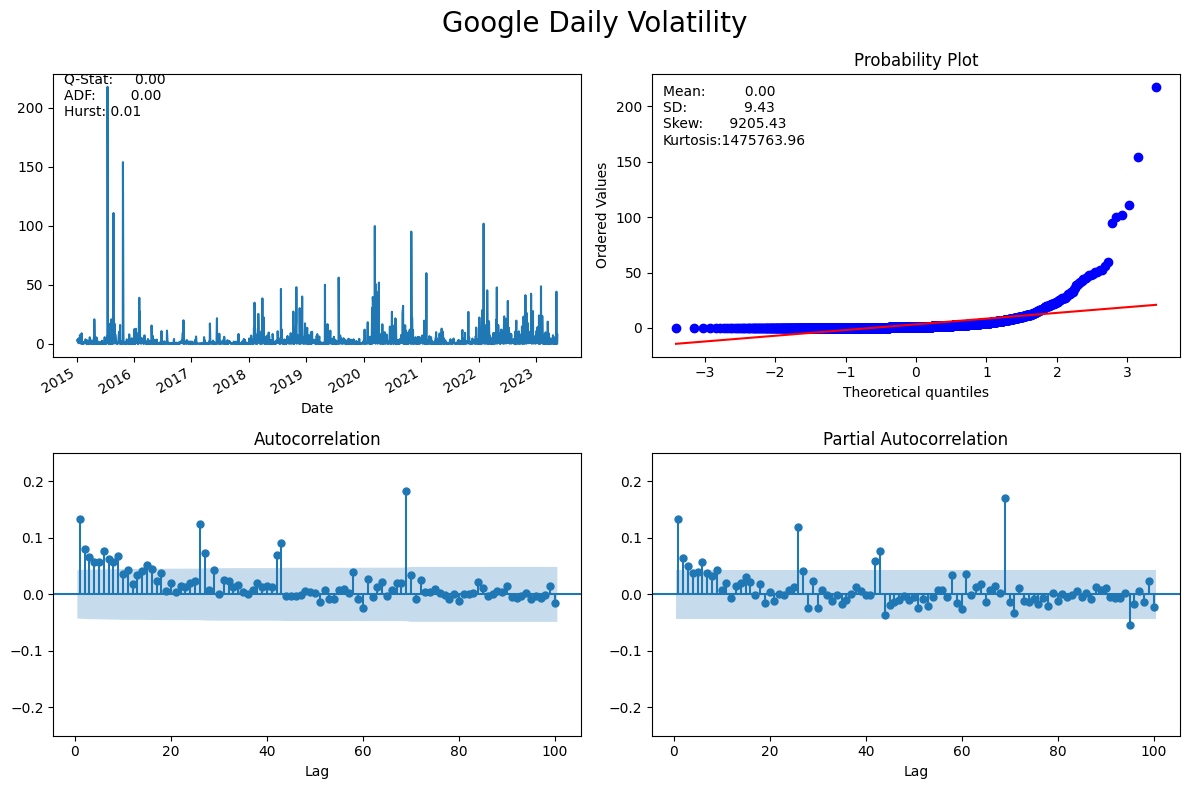

In [60]:
plot_correlogram(df['return_prc'].sub(df['return_prc'].mean()).pow(2), lags=100, title='Google Daily Volatility')

In [90]:
df['volatility'] = df['return_prc'] **2

In [66]:
# Specify GARCH model assumptions
basic_gm = arch_model(df['return_prc'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit(update_freq = 4)

Iteration:      4,   Func. Count:     29,   Neg. LLF: 4067.584661450288
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4127.203710313256
Iteration:     12,   Func. Count:     75,   Neg. LLF: 4060.548147891316
Iteration:     16,   Func. Count:     95,   Neg. LLF: 4060.546418545039
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4060.54641770563
            Iterations: 17
            Function evaluations: 100
            Gradient evaluations: 17


In [67]:
# Display model fitting summary
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             return_prc   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4060.55
Distribution:                  Normal   AIC:                           8129.09
Method:            Maximum Likelihood   BIC:                           8151.70
                                        No. Observations:                 2105
Date:                Mon, May 22 2023   Df Residuals:                     2104
Time:                        22:17:25   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1027  6.313e-02      1.627      0.104 [-2.10

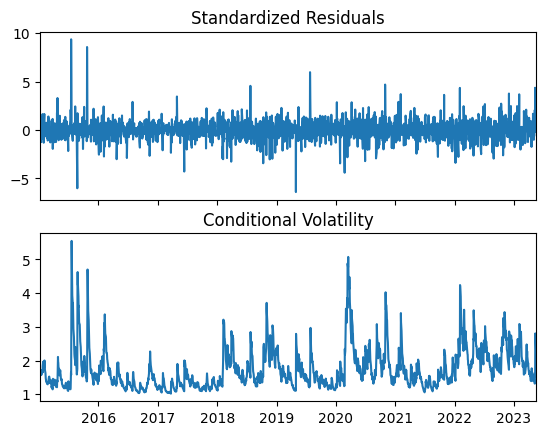

In [68]:
# Plot fitted results
gm_result.plot()
plt.show()

In [70]:
# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)

# Print the forecast variance
print(gm_forecast.variance[-1:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2023-05-17  5.334273  5.293442  5.254167  5.216389  5.180052


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [77]:
# Specify GARCH model assumptions
skewt_gm = arch_model(df['return_prc'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')

# Fit the model
skewt_result = skewt_gm.fit(disp = 'off')

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

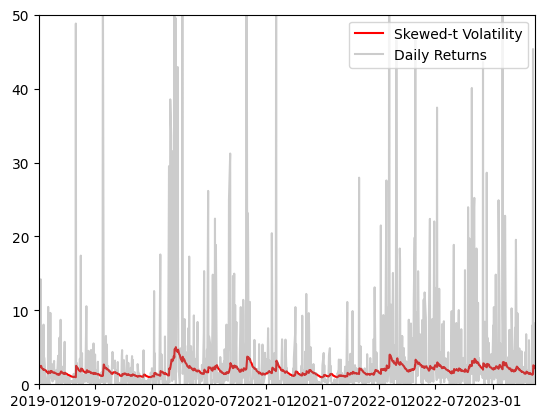

In [92]:
import matplotlib.dates as mdates

# Plot model fitting results
plt.plot(skewt_vol, color = 'red', label = 'Skewed-t Volatility')
plt.plot(df['volatility'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.ylim(0, 50) # Setează limita pe axa Y între 0 și 50
plt.xlim(mdates.date2num(pd.to_datetime('2019-01-01')), mdates.date2num(df.index.max())) # Setează limita pe axa X între 2019 și data finală din df
plt.legend(loc = 'upper right')
plt.show()

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


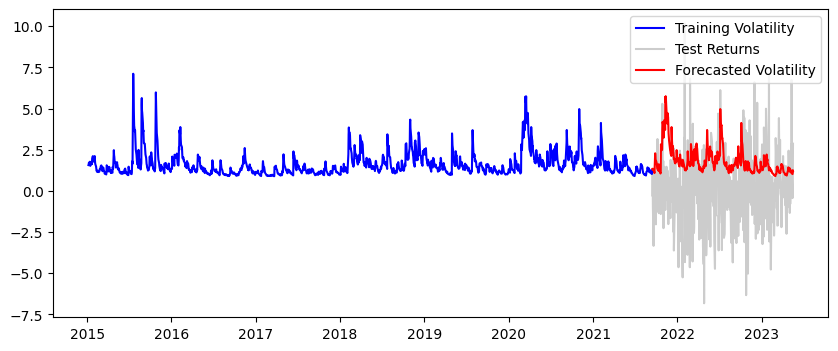

In [93]:
# Import the necessary library
from arch import arch_model
import matplotlib.pyplot as plt

# Number of observations in the test data
test_size = int(len(df) * 0.2)

# Split the data into training and test data
train, test = df[:-test_size], df[-test_size:]

# Specify the model
gm = arch_model(train['return_prc'], p=1, q=1, mean='constant', vol='GARCH', dist='skewt')

# Fit the model
model_fit = gm.fit(disp='off')

# Forecast volatility
forecasts = model_fit.forecast(start=0, horizon=1)

# Get the forecasted volatility
forecasted_vol = np.sqrt(forecasts.variance)

# Plot the results
plt.figure(figsize=(10,4))
plt.plot(train.index, model_fit.conditional_volatility, color='blue', label='Training Volatility')
plt.plot(test.index, test['return_prc'], color='grey', label='Test Returns', alpha=0.4)
plt.plot(test.index, forecasted_vol.iloc[-test_size:, -1], color='red', label='Forecasted Volatility')
plt.legend(loc='upper right')
plt.show()

aic: 7185.27956 | order: (2, 1)


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


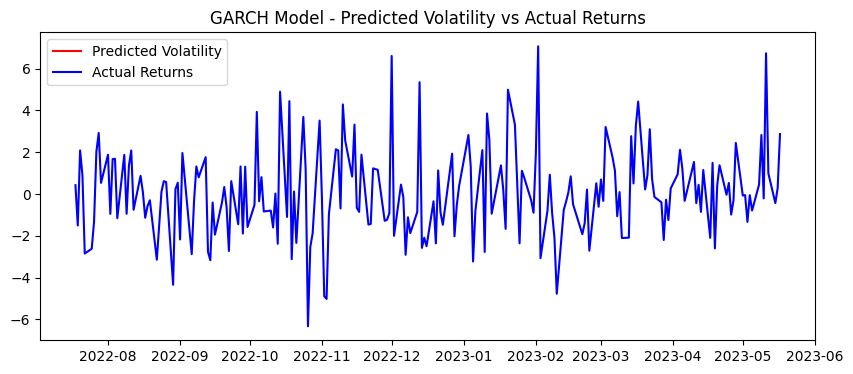

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from arch import arch_model
import matplotlib.pyplot as plt

# Presupunem că 'returns' este seria ta de timp
returns = df['return_prc']

# Împărțim datele în seturi de antrenament și test
train_size = int(len(returns) * 0.9)
train, test = returns[0:train_size], returns[train_size:]

best_aic = np.inf 
best_order = None
best_model = None

# Iterăm prin diferite combinații de p și q pentru a găsi cel mai bun model GARCH
for p in range(4):
    for q in range(4):
        try:
            temp_model = arch_model(train, vol='Garch', p=p, q=q)
            temp_model_fit = temp_model.fit(disp='off')
            temp_aic = temp_model_fit.aic
            if temp_aic < best_aic:
                best_aic = temp_aic
                best_order = (p, q)
                best_model = temp_model_fit
        except: continue

print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

# Previziuni
forecasts = best_model.forecast(start=test.index[0], horizon=len(test)-1)

# Creăm un DataFrame pentru a stoca previziunile
predicted_values = pd.DataFrame(forecasts.variance.values[-1, :], columns=['predicted volatility'], index=test.index[1:])

# Comparăm previziunile cu valorile reale
plt.figure(figsize=(10,4))
plt.plot(predicted_values, color='red', label='Predicted Volatility')
plt.plot(test, color='blue', label='Actual Returns')
plt.title('GARCH Model - Predicted Volatility vs Actual Returns')
plt.legend()
plt.show()